In [2]:
#| echo: false
#| output: false

%pip install matplotlib-venn

import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn3

Note: you may need to restart the kernel to use updated packages.


# Probability

[Open in Colab](https://colab.research.google.com/github/febse/stat2024/blob/main/03-Probability.ipynb)

Let us start with the definition of probability. We will return to it later in much more detail.

:::{#def-probability}
## Probability

A probability law is a function that assigns a number between 0 and 1 to each (measurable) event in the sample space. Let $\Omega$ be a non-empty set and
let $A$ and $B$ be subsets of $\Omega$. A probability law must satisfy the following properties:

1. $P(A) \geq 0$ for all $A \subseteq \Omega$ (all events have non-negative probability).
2. $P(\emptyset) = 0$. (The probability of the empty set is 0).
3. $P(\Omega) = 1$. (The probability of the entire sample space is 1).
4. If $A$ and $B$ are disjoint, i.e. $A \cap B = \emptyset$, then $P(A \cup B) = P(A) + P(B)$.

:::

In the following, we will discuss the key terms in the definition of probability.



## Sets

As you can see the definition of probability heavily relies on the concept of sets. A set is a collection of distinct objects, considered as an object in its own right. We will use capital letters to denote sets, and the elements of a set will be denoted by lowercase letters.

There are a couple of important set operations that we will use in the context of probability:

1. **Union**: The union of two sets $A$ and $B$ is the set of elements that are in $A$, in $B$, or in both. The union of $A$ and $B$ is denoted by $A \cup B$.
2. **Intersection**: The intersection of two sets $A$ and $B$ is the set of elements that are in both $A$ and $B$. The intersection of $A$ and $B$ is denoted by $A \cap B$.
3. **Complement**: The complement of a set $A$ is the set of elements that are not in $A$. The complement of $A$ is denoted by $A^c$ (or sometimes $\bar{A}$).
4. **Difference**: The difference of two sets $A$ and $B$ is the set of elements that are in $A$ but not in $B$. The difference of $A$ and $B$ is denoted by $A \setminus B$.

:::{#def-emptyset}
## The Empty Set

The empty set is a special set that contains no elements. It is denoted by $\emptyset$ or $\{\}$.

:::

:::{#def-disjoint}
## Disjoint sets

Two sets are called disjoint if their intersection is the empty set, i.e. $A \cap B = \emptyset$. This means that the sets do not have any elements in common.

:::


The union and intersection of sets are _commutative_ and _distributive_. Commutative means that you can change the order of the sets without changing the result.

- For example, $A \cup B = B \cup A$.
- For example, $A \cap B = B \cap A$.

Distributive means that you can distribute the union or intersection over the other set.

- For example, $A \cup (B \cap C) = (A \cup B) \cap (A \cup C)$.
- For example, $A \cap (B \cup C) = (A \cap B) \cup (A \cap C)$.

:::{#thm-de-morgan}
## De Morgan's Laws

De Morgan's laws are a pair of rules that relate the complement of the union and the intersection of sets.

1. The complement of the union of two sets is the intersection of their complements: $(A \cup B)^c = A^c \cap B^c$.
2. The complement of the intersection of two sets is the union of their complements: $(A \cap B)^c = A^c \cup B^c$.

This also generalizes to more than two sets.

Let $A_1$, $A_2$, $\ldots$, $A_n$ be sets. Then,

1. The complement of the union of the sets is the intersection of their complements: 

$$
(\cup_{i=1}^n A_i)^c = \cap_{i=1}^n A_i^c
$$.

2. The complement of the intersection of the sets is the union of their complements:

$$
(\cap_{i=1}^n A_i)^c = \cup_{i=1}^n A_i^c
$$.

:::

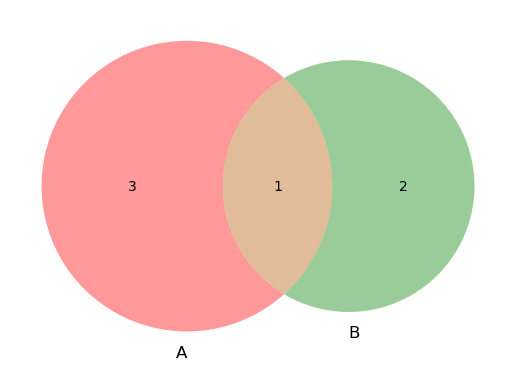

In [3]:
#| label: fig-venn-intersecting
#| fig-cap: "Two sets intersecting"

venn2([
    set(['1', '2', '3', '4']), 
    set(['2', '5', '6'])
    ], 
    set_labels=["A", "B"]
)


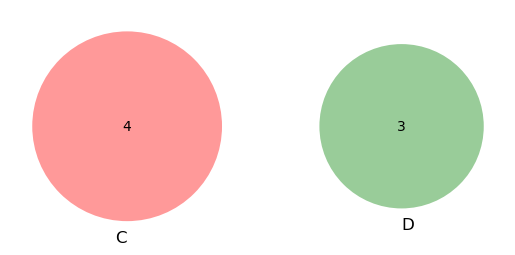

In [4]:
#| label: fig-venn-disjoint
#| fig-cap: "Two disjoint sets"

venn2([
    set(['1', '2', '3', '4']), 
    set(['5', '6', '7'])
    ],
    set_labels=["C", "D"]
)


:::{#exr-de-morgan}
## De Morgan's Laws

Use the sets from the Venn diagram in @fig-venn-intersecting to show the validity of De Morgan's laws.

- The first set is $A = \{1, 2, 3, 4\}$
- The second set is $B = \{2, 5, 6\}$

- Write down the complements of $A$ and $B$ and the intersection of $A$ and $B$. 
- Then, write down the union of $A$ and $B$ and its complement. Compare the results.

:::

:::{#exr-de-morgan-2}

A consumer survey indicates that 60 percent of the customers will buy product A, 70 percent will buy product B, and 40 percent will buy both products. What is the probability that a randomly selected customer will buy neither product A nor product B?

:::

## The Sample Space

Consider a couple of simple experiments with a random outcome

- The classic example is flipping a coin once: the outcomes can be either heads or tails.
- Another example is rolling a die: the outcomes can be any of the numbers 1, 2, 3, 4, 5, or 6.

The sample space of the experiment is the set of _all_ possible outcomes. For the coin flip, the sample space is $\{H, T\}$, and for the die roll, the sample space is $\{1, 2, 3, 4, 5, 6\}$. These are very easy examples, but depending on the experiment, the sample space can be much more complex.

There are a couple of rules that the sample space must follow:

1. The sample space must be **exhaustive**: it must contain all possible outcomes. For example, if you are flipping a coin, the sample space must include both heads and tails: a sample space of $\{H\}$ would not be exhaustive.
2. The elements of the sample space must be **mutually exclusive**: when the experiment is performed, only _one_ of the elements of $\Omega$ can occur.




## Events and Probability

An event is a subset of the sample space. For example, if you are flipping a coin, the event of getting heads is the subset $\{H\}$ of the sample space $\{H, T\}$. If you are rolling a die, the event of getting an even number is the subset $\{2, 4, 6\}$ of the sample space $\{1, 2, 3, 4, 5, 6\}$.

In experiments with a **finite number of equally likely outcomes**, the probability of an event is the number of outcomes in the event divided by the total number of outcomes in the sample space. For example, the probability of getting heads when flipping a coin is $1/2$ because there is one outcome in the event $\{H\}$ and two outcomes in the sample space $\{H, T\}$. The probability of getting an even number when rolling a die is $3/6 = 1/2$ because there are three outcomes in the event $\{2, 4, 6\}$ and six outcomes in the sample space $\{1, 2, 3, 4, 5, 6\}$.


$$
P(A) = \frac{\text{number of elements in } A}{\text{number of elements in the sample space}}
$$


## Some Properties of Probability Laws

The definition of probability appears simple, but we will see that we can derive surprisingly many properties from it.

The probability of the union of two events is the sum of the probabilities of the events minus the probability of their intersection.

:::{#thm-probability-union}
## Probability of the Union of Two Events

$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

:::


:::{#thm-probability-of-complement}
## Probability of the Complement

The probability of an event is one minus the probability of the complement of the event.

$$
P(A) = 1 - P(A^c)
$$
:::
:::{.proof}
This follows directly from the definition of probability and the fact that $A \cap A^c = \emptyset$ and $A \cup A^c = \Omega$.

$$
P(A \cup A^c) = P(\Omega) = 1 \implies P(A) + P(A^c) = 1
$$
:::


For a justification of this formula, consider the Venn diagram in @fig-venn-intersecting. The probability of the union of the two events is the sum of the probabilities of the two events. However, the intersection of the two events is counted twice, so we need to subtract it once.

Use the following Venn diagram to show the validity of the formula.

$$
P(A \cup B \cup C) = P(A) + P(A^c \cap B) + P(A^c \cap B^c \cap C)
$$


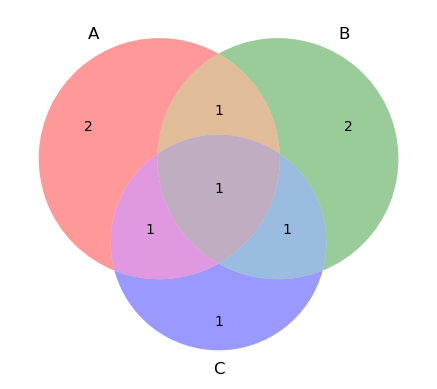

In [5]:
#| label: fig-venn-three-intersecting
#| fig-cap: "Three sets intersecting. The values shown within the sets are the number of elements in each set."

venn3((
    set(['1', '2', '3', '4', '9']), 
    set(['3', '5', '6', '7', '9']), 
    set(['2', '3', '5', '8'])),
    set_labels=["A", "B", "C"]
)



## Discrete Sample Spaces

A sample space is discrete if it consists of a finite or countably infinite number of outcomes. For example, the sample space of rolling a die is discrete because there are only six possible outcomes. The sample space of flipping a coin is also discrete because there are only two possible outcomes. The number of accidents in a day is also a discrete sample space because it can only take on integer values (which are countably infinite). The sample space of selecting a real number between 0 and 1 (or any other real interval) is not discrete because there are uncountably many possible outcomes (Cantor's theorem).


:::{#exr-sample-space-coin}
## The Sample Space of Three Coin Flips

Consider an experiment of flipping a coin three times (each toss can result either in a head (H) or in a tail (T) ). 

- Write down the sample space of the experiment.
- Write down the set $A$ consisting of all outcomes where the first flip is a head.
- Write down the set $B$ consisting of all outcomes where the number of heads is even.
- Assume that the coin is fair and that all outcomes are equally likely. What are the probabilities of the events $A$ and $B$?
:::


In [6]:
# A coin flipping game

# Here we simulate the result of 3 coin flips repeated 10 times (1 for heads, 0 for tails)
# np.random.choice selects a value at random from the given list
# The size specifies the number of times the selection is made
# In our case, we are selecting 3 values 10 times and storing the results in coin_results

coin_3flips = np.random.choice([1, 0], size=[10, 3])
coin_3flips

array([[0, 1, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 1, 1],
       [1, 1, 0]])

In [7]:
# Check the shape of the coin_results array, it should be (10, 3), the same as the size we specified

coin_3flips.shape

(10, 3)

In [8]:
# The _number_ of games where the first coin landed on heads (1) in each of the 10 games
# - We select the first column of the matrix (coin_results[:, 0]), because the first coin flip is stored in the first column
# - We then check how many times the value 1 appears in the first column
# - The sum() function is used to count the number of times the value 1 appears in the first column

(coin_3flips[:, 0] == 1).sum()

2

In [9]:
# The _proportion_ of games where the number of heads in each game is even

(coin_3flips.sum(axis=1) % 2 == 0).mean()

0.4

:::{#exr-sample-space-die}
## The Sample Space of Two Die Rolls

Consider an experiment of rolling a four sided die twice.

![Four sided die](https://upload.wikimedia.org/wikipedia/commons/8/80/Dald%C3%B8s_dice.jpg){style="width:300px"}

- Write down the sample space of the experiment.
- How many outcomes are in the sample space?
- Write down the set (event) $A$ consisting of all outcomes where the sum of the two rolls is 7.
- Write down the set (event) $B$ consisting of all outcomes where the sum of the two rolls is odd.
- Write down the set (event) $C$ consisting of all outcomes where the first roll is greater than the second roll.
- Write down the set (event) $D$ consisting of all outcomes where the two rolls are the same.

Assume that the die is fair and that all outcomes are equally likely. 
- What are the probability of the events $A$ and $B$: $P(A)$ and $P(B)$?
- What is the probability of the event $A \cap B$?
- What is the probability of the event $A \cup B$?
- What is the probability of the event $A^c$?
- What is the probability of the event $A \cap C$?

:::

In [10]:
# Simulation of 10 rolls of a four-sided die

die_rolls = np.random.choice([1, 2, 3, 4], size=[10, 2])
die_rolls

array([[4, 2],
       [2, 2],
       [3, 2],
       [1, 3],
       [4, 1],
       [2, 1],
       [4, 1],
       [3, 2],
       [2, 4],
       [2, 1]])

In [11]:
# Event A: sum of the two rolls is greater than 7
# - we can sum the values in each row to get the total of the two rolls: this is what die_rolls.sum(axis=1). The axes in the arrays are indexed: 0 for rows and 1 for columns
# - The == operator checks if the sum is equal to 7 and returns a boolean array (True and False)

event_A = (die_rolls.sum(axis=1) == 7)
event_A

array([False, False, False, False, False, False, False, False, False,
       False])

In [12]:
# Event B: sum of the two rolls is odd (the != operator checks for inequality)
# - as in the previous cell, we sum the values in each row to get the total of the two rolls
# - % is the modulo operator. If the sum is even, the modulo of 2 will be 0, and if it is odd, the modulo will be 1
# - the != operator checks if the modulo is different from zero and returns a boolean array (True and False)

event_B = (die_rolls.sum(axis=1) % 2 != 0)
event_B

array([False, False,  True, False,  True,  True,  True,  True, False,
        True])

In [13]:
# Event C: first roll is greater than the second roll.
# - the square brackets after the array are used to select parts of the array. The : operator selects all the elements in the array (in this case, all the rows)
# - after a comma we can specify the column we want to select. The first column has index 0 and the second column has index 1
# - the > operator checks if the value in the first column is greater than the value in the second column and returns a boolean array (True and False)

event_C = (die_rolls[:, 0] > die_rolls[:, 1])
event_C

array([ True, False,  True, False,  True,  True,  True,  True, False,
        True])

In [14]:
# Event D: $D$ the two rolls are the same.
# Exactly as before, but here we check for equality using the == operator

event_D = (die_rolls[:, 0] == die_rolls[:, 1])
event_D

array([False,  True, False, False, False, False, False, False, False,
       False])

In [15]:
# The intersection of A and B (A and B occurring together)
# - The & operator is used to combine two boolean arrays. It returns a new boolean array where the value is True only if both arrays have True in the same position

event_A_and_B = event_A & event_B
event_A_and_B.sum()

0

## Exercises


:::{#exr-racing}
## Racing Cars and Betting

Consider a car race with 6 cars. You believe that the probability of winning is equal for the first three cars, and the probabilities of winning for cars 4, 5, and 6 are equal to 1/7. You must place a bet on one of the following two events:

- One of cars 1, 2, or 5 wins
- One of cars 3, 5, or 6 wins

Which event would you bet on? Justify your answer. The reward is the same for both events.
:::


:::{#exr-probability-customers}
## Student Enrollment

A total of 36 students in a class are enrolled in a statistics course, 28 in microeconomics, and 18 in an macroeconomics course. Furthermore, 22 of the students study both statistics and microeconomics, 12 study both statistics and macroeconomics, 9 study both microeconomics and macroeconomics, and 4 are enrolled in all three courses. You select a student at random. What is the probability that the student is enrolled in at least one of the courses?

:::



:::{#exr-dice-rolls-until-4}
## Dice Rolls Until 2

You take a four-sided die and roll it until you get a 2. Describe the sample space of the experiment.

:::

:::{#exr-probability-model}
## Probability Model

You are given a loaded four-sided die. The even numbers are twice as likely as the odd numbers, but the 
each even number is equally likely and each odd number is equally likely. Construct a probability model for this die.

:::


:::{#exr-bonferroni}
## Bonferroni's Inequalities

Let $A$ and $B$ be two events. Show that

$$
P(A \cap B) \geq P(A) + P(B) - 1
$$

Also, let $A_1, A_2, \ldots, A_n$ be a sequence of events. Show that

$$
P(\cap_{i=1}^n A_i) \geq \sum_{i=1}^n P(A_i) - n + 1
$$

:::

:::{#def-partition}
## Partition

Let $\Omega$ be a set. A sequence of disjoint subsets of $\Omega$, $A_1, A_2, \ldots, A_n$, is called a partition of $\Omega$ if their union is $\Omega$, i.e. 

$$
A_1 \cup A_2 \cup \ldots \cup A_n = \Omega
$$.
:::

:::{#exr-partition}
## Partition

If $A_1, A_2, \ldots, A_n$ is a partition of $\Omega$, then argue why for any subset $B$ in $\Omega$, we have

$$
B = B \cap \Omega = B \cap (A_1 \cup A_2 \cup \ldots \cup A_n) = (B \cap A_1) \cup (B \cap A_2) \cup \ldots \cup (B \cap A_n)
$$.

:::

:::{#exr-probability}


Let $A$ and $B$ be two sets. Describe the set $(A \cap B^c) \cup (A^c \cap B)$ in words and use a Venn diagram to illustrate it. Use the Venn diagram to explain why the following formula holds:

$$
P((A \cap B^c) \cup (A^c \cap B)) = P(A) + P(B) -2 P(A \cap B),
$$
:::

:::{#exr-simulation}
## Dice Rolls Simulation

You roll two six-sided dice 1000 times. In how many games would you expect to get a sum greater than 10?

Take the example of the four-sided dice and adapt it to this case. Compute the number and the proportion of games where the sum is greater than 10.

:::

In [16]:
# Write your code here and run it


## Further Reading

Some results in probability theory can be confusing and counter-intuitive. A classic example is the matching problem. Consider a room with $n$ dancing couples. If the couples are randomly paired, what is the probability that after the pairing, no one is matched with their original partner? The answer is not zero, but it is also not one. 

Here we will approach the problem through a simulation. We will randomly pair the couples and count the number of times no one is matched with their original partner. We will then compare the simulation results with the theoretical results.

In [65]:
# NOTE: code for illustration purposes only

n = 300 # Number of pairs
R = 1000 # Number of simulations

partners = np.arange(n)
new_partners = np.array([np.random.permutation(partners) for _ in range(R)])

np.apply_along_axis(lambda x: (x == partners).sum() == 0, 1, new_partners).mean()

0.36